In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

c:\python36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
sess = tf.InteractiveSession()

In [3]:
from libs import inception

In [4]:
net = inception.get_inception_model()

In [5]:
tf.import_graph_def(net['graph_def'], name='inception')

In [6]:
# printing 25 of 1000 labels
net['labels'][:25]

[(0, 'dummy'),
 (1, 'kit fox'),
 (2, 'English setter'),
 (3, 'Siberian husky'),
 (4, 'Australian terrier'),
 (5, 'English springer'),
 (6, 'grey whale'),
 (7, 'lesser panda'),
 (8, 'Egyptian cat'),
 (9, 'ibex'),
 (10, 'Persian cat'),
 (11, 'cougar'),
 (12, 'gazelle'),
 (13, 'porcupine'),
 (14, 'sea lion'),
 (15, 'malamute'),
 (16, 'badger'),
 (17, 'Great Dane'),
 (18, 'Walker hound'),
 (19, 'Welsh springer spaniel'),
 (20, 'whippet'),
 (21, 'Scottish deerhound'),
 (22, 'killer whale'),
 (23, 'mink'),
 (24, 'African elephant')]

In [7]:
g = tf.get_default_graph()
names = [op.name for op in g.get_operations()]
print(names)

['inception/input', 'inception/conv2d0_w', 'inception/conv2d0_b', 'inception/conv2d1_w', 'inception/conv2d1_b', 'inception/conv2d2_w', 'inception/conv2d2_b', 'inception/mixed3a_1x1_w', 'inception/mixed3a_1x1_b', 'inception/mixed3a_3x3_bottleneck_w', 'inception/mixed3a_3x3_bottleneck_b', 'inception/mixed3a_3x3_w', 'inception/mixed3a_3x3_b', 'inception/mixed3a_5x5_bottleneck_w', 'inception/mixed3a_5x5_bottleneck_b', 'inception/mixed3a_5x5_w', 'inception/mixed3a_5x5_b', 'inception/mixed3a_pool_reduce_w', 'inception/mixed3a_pool_reduce_b', 'inception/mixed3b_1x1_w', 'inception/mixed3b_1x1_b', 'inception/mixed3b_3x3_bottleneck_w', 'inception/mixed3b_3x3_bottleneck_b', 'inception/mixed3b_3x3_w', 'inception/mixed3b_3x3_b', 'inception/mixed3b_5x5_bottleneck_w', 'inception/mixed3b_5x5_bottleneck_b', 'inception/mixed3b_5x5_w', 'inception/mixed3b_5x5_b', 'inception/mixed3b_pool_reduce_w', 'inception/mixed3b_pool_reduce_b', 'inception/mixed4a_1x1_w', 'inception/mixed4a_1x1_b', 'inception/mixed4a_3

In [8]:
input_name = names[0] + ':0'
x = g.get_tensor_by_name(input_name) 
#print(g.get_tensor_by_name(names[0]+':0'))

softmax = g.get_tensor_by_name(names[-1]+':0')

0 255


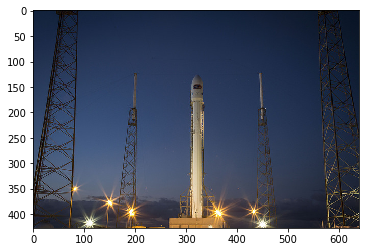

In [9]:
from skimage.data import rocket
og = rocket()
plt.imshow(og)
print(og.min(), og.max())

In [10]:
img = inception.preprocess(og)
print(og.shape)
print(img.shape)

(427, 640, 3)
(299, 299, 3)


c:\python36\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
c:\python36\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


In [11]:
print(img.min(), img.max())

-111.34955 138.0


In [12]:
img_4d = img[np.newaxis] # converting 3d array to 4d by adding 1 more dimension
print(img_4d.shape)

(1, 299, 299, 3)


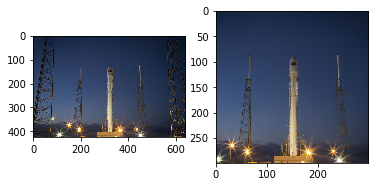

In [13]:
fig, ax = plt.subplots(1,2)
ax[0].imshow(og)

ax[1].imshow(inception.deprocess(img))

In [14]:
res = np.squeeze(softmax.eval(feed_dict={x: img_4d}))

In [15]:
# there will be 16 outputs of 1008 probabilities.
# We only use the first 1000 probabilities (the extra ones are for negative/unseen labels)
res.shape 

(16, 1008)

In [16]:
print(res)

[[5.63896674e-06 1.80292282e-05 6.36930781e-06 ... 5.63856338e-06
  5.63921412e-06 5.63894537e-06]
 [2.57813031e-06 1.04138817e-05 2.99334283e-06 ... 2.57794341e-06
  2.57824331e-06 2.57811803e-06]
 [2.12937266e-06 9.57204338e-06 2.31227614e-06 ... 2.12922032e-06
  2.12946588e-06 2.12936243e-06]
 ...
 [1.35941081e-08 6.66678872e-08 1.17901715e-08 ... 1.35931231e-08
  1.35947040e-08 1.35940565e-08]
 [8.16901835e-09 4.38399113e-08 6.84753321e-09 ... 8.16842682e-09
  8.16937629e-09 8.16898726e-09]
 [1.72042522e-08 8.07156866e-08 1.43724703e-08 ... 1.72030052e-08
  1.72050054e-08 1.72041528e-08]]


In [17]:
# aggreate 16 differet probablities
agg_res = np.mean(res, 0)
# take argmax
agg_res = agg_res / np.sum(res)
print(agg_res)

[6.0928002e-08 2.3507556e-07 6.7601903e-08 ... 6.0923618e-08 6.0930681e-08
 6.0927725e-08]


In [18]:
print([ ("Probality:",agg_res[idx], "Label:",net['labels'][idx])
        for idx in agg_res.argsort()[-5:][::-1]])

[('Probality:', 0.025099486, 'Label:', (251, 'missile')), ('Probality:', 0.012885506, 'Label:', (834, 'drilling platform')), ('Probality:', 0.005778347, 'Label:', (542, 'projectile')), ('Probality:', 0.0047272504, 'Label:', (234, 'space shuttle')), ('Probality:', 0.0032162813, 'Label:', (691, 'mosque'))]


### Visualizing Filters

In [20]:
W = g.get_tensor_by_name('inception/conv2d0_w:0')
W_eval = W.eval()
print(W_eval.shape)

(7, 7, 3, 64)


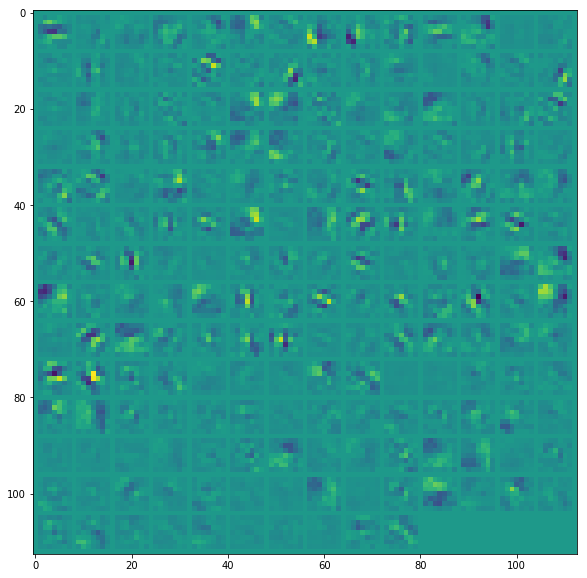

In [21]:
from libs import utils
W_montage = utils.montage_filters(W_eval)
plt.figure(figsize=(10,10))
plt.imshow(W_montage, interpolation='nearest')